In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# using the kaggle csv
df = pd.read_csv('music_feats.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [2]:
df = df[['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate','label']]
genres = df['label'].unique()
genres

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

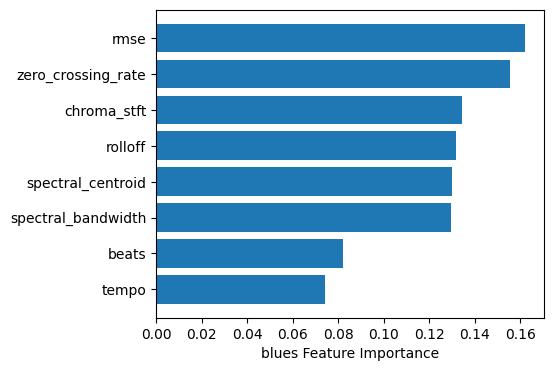

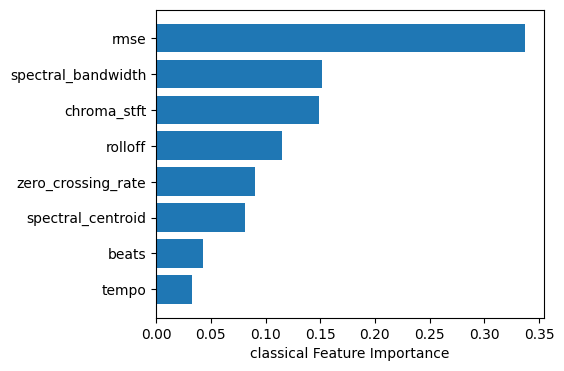

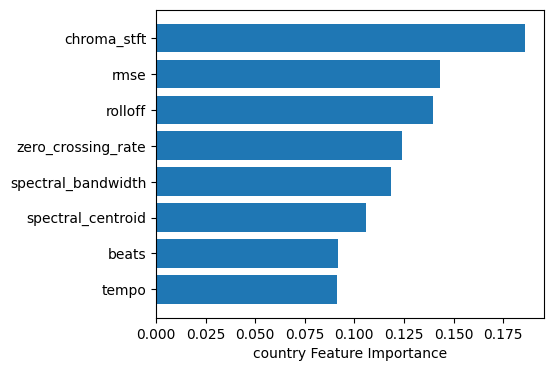

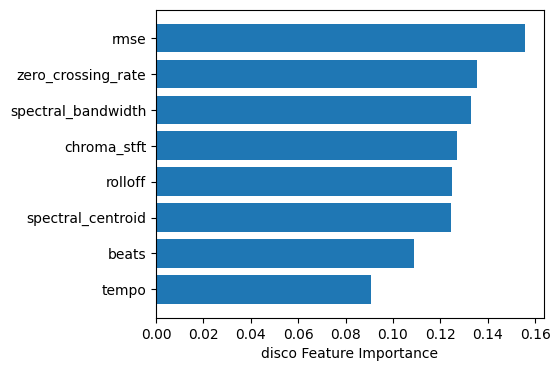

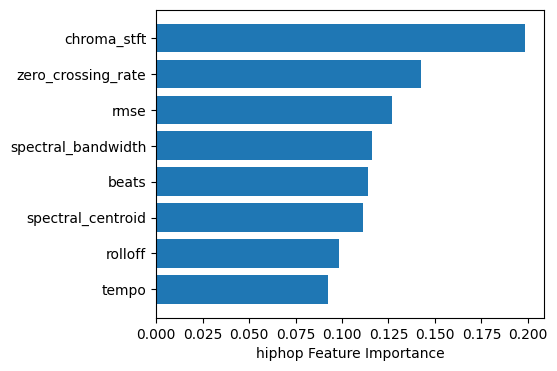

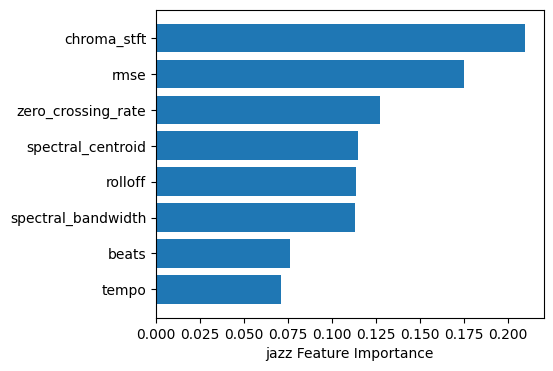

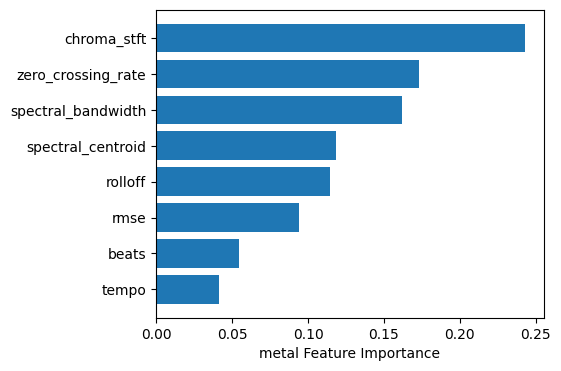

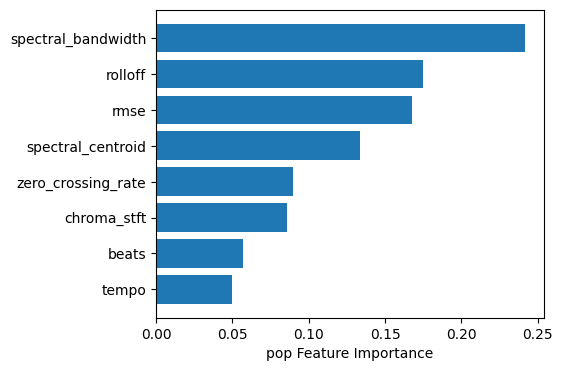

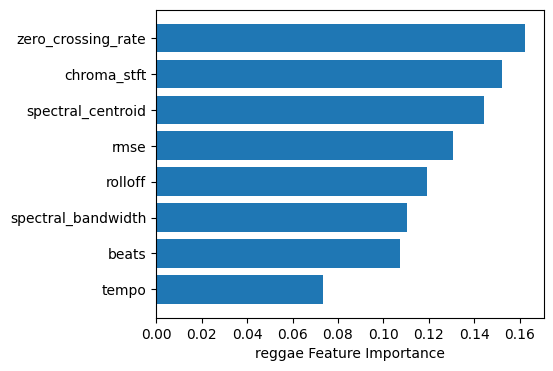

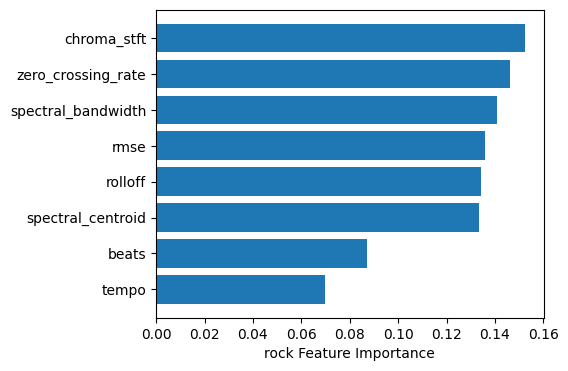

In [3]:
from copy import copy
from sklearn.ensemble import RandomForestClassifier

df_new = pd.DataFrame(columns=['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate'])

for genre in genres:
    df_copy = df.copy()

    def update_label(label):
        if label == genre:
            return genre
        else:
            return 'other'

    df_copy['label'] = df_copy['label'].apply(update_label)

    df_true_y = df_copy['label']
    df_x = df_copy[['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate']]
    x_feat_list = df_x.columns

    x = df_x.values
    y = df_true_y.values

    n_estimators = 100
    rf_clf = RandomForestClassifier(n_estimators=n_estimators)

    # fit random forest to data
    rf_clf.fit(x, y)

    feat_list = x_feat_list
    feat_import = rf_clf.feature_importances_

    df_new.loc[genre] = feat_import

    # sort features in decreasing importance
    idx = np.argsort(feat_import).astype(int)
    feat_list = [feat_list[_idx] for _idx in idx]
    feat_import = feat_import[idx]

    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    title = str(genre) + ' Feature Importance'
    plt.xlabel(title)
    plt.show()
    

In [22]:
df_new.to_dict()

{'tempo': {'blues': 0.07426640198450378,
  'classical': 0.032537498618939405,
  'country': 0.0913165029316345,
  'disco': 0.09054999506865677,
  'hiphop': 0.09241150030191901,
  'jazz': 0.0710441034333738,
  'metal': 0.04120520462500863,
  'pop': 0.04979041472046847,
  'reggae': 0.07346304858774752,
  'rock': 0.06994256797975891},
 'beats': {'blues': 0.08223563153992226,
  'classical': 0.0428337681628676,
  'country': 0.09169913981659744,
  'disco': 0.10895642969137967,
  'hiphop': 0.11375311315481614,
  'jazz': 0.0758542167690421,
  'metal': 0.054457015423455005,
  'pop': 0.05687686999532426,
  'reggae': 0.10741144969804033,
  'rock': 0.08729102594909544},
 'chroma_stft': {'blues': 0.13433713357525617,
  'classical': 0.1492582269291321,
  'country': 0.18613073568670965,
  'disco': 0.1271199240689951,
  'hiphop': 0.19852725902941581,
  'jazz': 0.20959700267097747,
  'metal': 0.2429449808471413,
  'pop': 0.08600394595065051,
  'reggae': 0.1523248480897959,
  'rock': 0.15246750313769208}

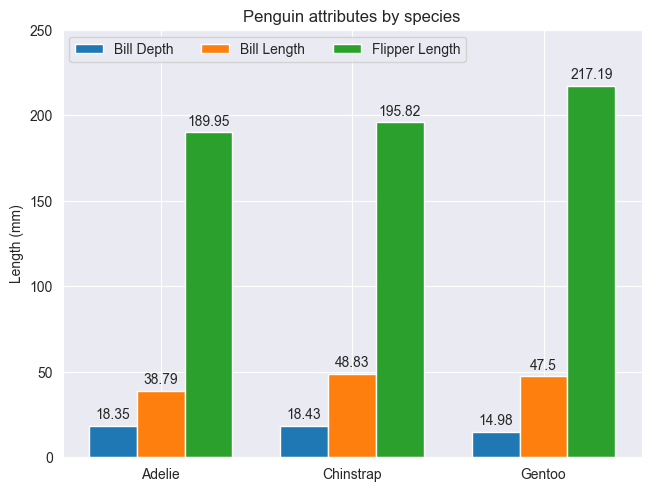

In [21]:
fig = px.scatter(df_new)
sns.set_style('darkgrid')
plt.show(fig)

genres=('blues', 'classical', 'country', 'disco', 'hiphop', 'jazz','metal', 'pop', 'reggae', 'rock')

species = genres


penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()